# Logistic Regression


## A Overview
- This is a machine learning model used for classification problems
- It is based on a linear model with the output transformed to a probability output.
- The transformer of the output of the linear model is known as the **sigmoid** function.
- For a classification problem with only one feature, the sigmoid is given by:
$$ y = \frac{1}{1+e^{-(w_0 + w_1X)}} $$

### B The Model
#### Q: What are $X$, $y$, $w_0$, $w_1$?
* $X$ is our input data
    * Question: What is the shape of X?
    * Answer: (No of data points, No. of features)
        * e.g. (no. of penguins, no. of penguins characteristics we want to use)
    * $y$ and $y_{true}$ are the our labels
    * $y_{pred}$ are our predicted labels from our model
    * $w_0$ and $w_1$ are the model parameters (in this case coefficient and intercept). **They are learned by the model** to minimize the loss between $y_{true}$ and $y_{pred}$

#### B.1 Penguins dataset 
* If we're using only two featuers e.g. culmin depth and flipper length, our logistic regression takes the form:
$$ y = \frac{1}{e^{-(w_0 + w_1x_1 + w_2x_2)}} $$

* If we're using only all four numerical features, our logistic regression is:
$$ y = \frac{1}{e^{-(w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4)}} $$

$x_1$ to $x_4$ are our features and $w_0$ to $w_4$ are our parameters



### C Visualization of $w_0$ and $w_1$ 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def sigmoid(w0, w1, x):
    return 1/(1+np.exp(-(w0 + w1*x)))

In [10]:
X = np.linspace(-10, 10, 300)

In [18]:
w0 = 0
w1 = 1

#### 3.1 Sigmoid function for single feature

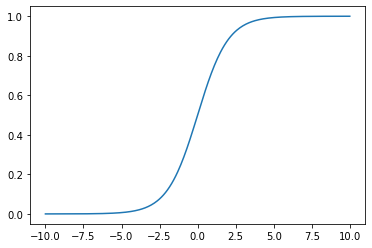

In [14]:
plt.plot(X, sigmoid(w0, w1, X));

#### 3.2 Effect of slope and bias on sigmoid function

In [32]:
w1_list = [0.5 ,1, 5]
w0_list = [-5, 0, 5]

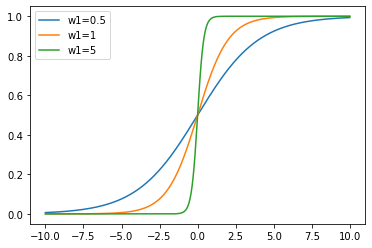

In [33]:
for val in w1_list:
    plt.plot(X, sigmoid(w0, val, X))
plt.legend([f"w1={i}" for i in w1_list])

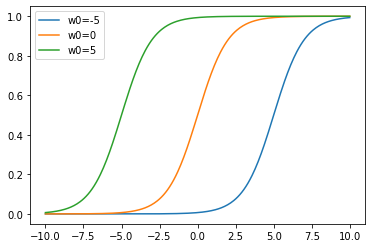

In [35]:
for val in w0_list:
    plt.plot(X, sigmoid(val, w1, X))
plt.legend([f"w0={i}" for i in w0_list]);

# Logistic Regression with penguins

## 1. Define (business) goal

Train a model that is better than the DummyClassifier to predict if a penguin belongs to the **Gentoo** or the **Adelie** `species` using only the feature `body mass`

## 2. Get Data 

- Read in data set from seaborn
- Get rid of the third class (Chinstrap) as we want a binary classification

In [36]:
df = sns.load_dataset('penguins')

In [37]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [38]:
df = df.loc[df['species']!= 'Chinstrap']

is equivalent to

In [39]:
df.loc[(df['species'] == 'Adelie')|(df['species'] == 'Gentoo'),:]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### 2.1 Plot a scatter of e.g. body mass and flipper length 
- Use color to distinguish the species

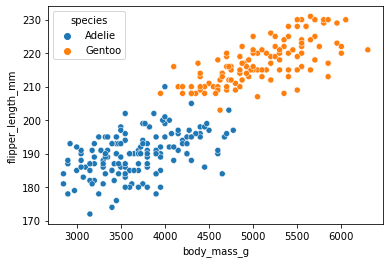

In [44]:
sns.scatterplot(data=df, x="body_mass_g", y="flipper_length_mm", hue="species");

In [45]:
df.dropna(inplace = True)

In [46]:
df.shape

(265, 7)

### 2.2 Define X and y

In [51]:
X = df[["body_mass_g"]]
y = df["species"]

In [52]:
X.shape, y.shape

((265, 1), (265,))

## 3. Train-test split 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [55]:
X_train.shape, y_train.shape

((212, 1), (212,))

In [56]:
X_test.shape, y_test.shape

((53, 1), (53,))

## 4. Explore the data

If we splitted the data before and we want to explore the data with our labels, we can create a `df_train` re-adding our labels.

In [57]:
df_train = pd.concat([X_train, y_train], axis = 1)

In [58]:
df_train.shape

(212, 2)

In [59]:
df_train.head()

,body_mass_g,species
247,5650.0,Gentoo
308,4875.0,Gentoo
23,3950.0,Adelie
96,3700.0,Adelie
257,5250.0,Gentoo


`sns.catplot`

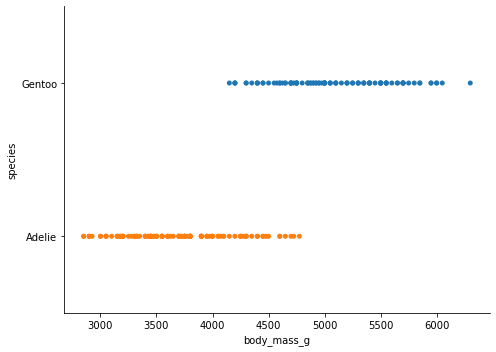

In [60]:
sns.catplot(data = df_train, x = 'body_mass_g', y = 'species', jitter = False, aspect = 1.4)

## 5. Feature Engineering 

Skipped for now: topic for tomorrow. 'Luckily' our goal was defines using only numerical values.

## 6. Train Model

#### Baseline

In [61]:
from sklearn.dummy import DummyClassifier

In [62]:
dm = DummyClassifier(strategy= 'most_frequent')

In [63]:
dm.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [64]:
round(dm.score(X_test, y_test),2)

0.62

### Logistic regression
* The model will find the coefficients (`w1`, `w0`) of the logistic function that result in the most accurate model (smallest possible log loss)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
m = LogisticRegression()

In [67]:
m.fit(X_train, y_train)

LogisticRegression()

Take a look at the coefficients

In [68]:
m.coef_

array([[0.0063681]])

In [69]:
m.intercept_,2

(array([-28.18698229]), 2)

In [70]:
f' w1: {m.coef_} and w0: {m.intercept_}'

' w1: [[0.0063681]] and w0: [-28.18698229]'

#### Bonus for simple example: check output Sigmoid Function

In [73]:
s = sigmoid(m.coef_, m.intercept_, X)

In [76]:
df['Sigmoid'] = s

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Sigmoid,Class
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0.0,0
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0.0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0.0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0.0,0


In [75]:
df['Class'] = 0

In [77]:
df.loc[df['species'] == "Adelie", 'Class'] = 1
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Sigmoid,Class
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0.0,1
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0.0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0.0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0.0,0


<AxesSubplot:xlabel='body_mass_g', ylabel='Class'>

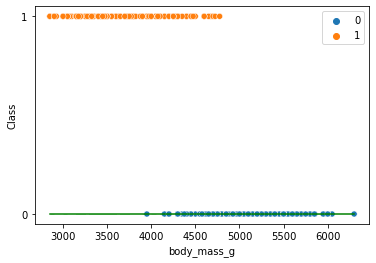

In [78]:
sns.scatterplot(x = df['body_mass_g'], y = df["Class"], hue = df["Class"])
plt.yticks([0,1])
sns.lineplot(x = df['body_mass_g'], y = df["Sigmoid"], color = "green")

### 7. Optimize
Not for now.

## 8. Evaluate model

In [79]:
# calculate the accuracy
round(m.score(X_test, y_test),2)

0.92

## 9. Predict

In [80]:
m.predict(X_test)

array(['Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie'], dtype=object)

In [60]:
m.predict_proba(X_test)

array([[9.86636615e-03, 9.90133634e-01],
       [9.97264356e-01, 2.73564436e-03],
       [9.99816862e-01, 1.83137647e-04],
       [9.54043151e-01, 4.59568490e-02],
       [5.41743394e-01, 4.58256606e-01],
       [9.92920411e-01, 7.07958946e-03],
       [1.93931977e-01, 8.06068023e-01],
       [6.90866347e-01, 3.09133653e-01],
       [9.54043151e-01, 4.59568490e-02],
       [9.97264356e-01, 2.73564436e-03],
       [5.80923482e-01, 4.19076518e-01],
       [2.48569562e-01, 7.51430438e-01],
       [9.70988242e-01, 2.90117582e-02],
       [9.37882752e-01, 6.21172480e-02],
       [1.58758085e-04, 9.99841242e-01],
       [5.67132008e-04, 9.99432868e-01],
       [5.24345274e-03, 9.94756547e-01],
       [3.81906760e-03, 9.96180932e-01],
       [9.99843812e-01, 1.56188344e-04],
       [9.99100764e-01, 8.99235869e-04],
       [9.98945742e-01, 1.05425810e-03],
       [1.70249075e-01, 8.29750925e-01],
       [8.53132864e-01, 1.46867136e-01],
       [4.12543641e-04, 9.99587456e-01],
       [7.796025